In [1]:
#3. Import the required packages with their customary aliases as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#4. Use the %matplotlib inline magic command so that your plots show in the 
# notebook without having to call plt.show() every time.
%matplotlib inline

In [3]:
#5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6869)

In [4]:
# 6. Repeat for the internet use dataset. Call this DataFrame internet_df.
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4496)

In [5]:
# 5b. Take a look at the first 6 rows.
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [6]:
# 6b. Take a look at the first six rows.
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each DataFrame - how many rows? How many columns?

gdp_df 4 columns, 6869 rows
internet_df 4 columns, 4496 columns
gdp_df has 6873 rows, but the last 4 are just notation and footer so 6869 rows that are needed here.
internet_df has 4688 rows but a lot of footer notes, so we cut those out to leave 4496 rows.

In [7]:
# 8. Take a look at the datatypes for the columns in each DataFrame.
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object
Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object


In [8]:
# 9. Take a look at the last 10 rows of each DataFrame in turn.
print(gdp_df.tail(10))
print(internet_df.tail(10))
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"})
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
internet_df = internet_df.drop(columns=['Value Footnotes'])

     Country or Area      Year        Value  Value Footnotes
6859        Zimbabwe      1998  3653.920016              NaN
6860        Zimbabwe      1997  3580.048793              NaN
6861        Zimbabwe      1996  3520.430146              NaN
6862        Zimbabwe      1995  3226.413930              NaN
6863        Zimbabwe      1994  3263.934978              NaN
6864        Zimbabwe      1993  3033.504852              NaN
6865        Zimbabwe      1992  3054.889178              NaN
6866        Zimbabwe      1991  3426.598094              NaN
6867        Zimbabwe      1990  3324.348171              NaN
6868   footnoteSeqID  Footnote          NaN              NaN
     Country or Area      Year     Value  Value Footnotes
4486        Zimbabwe      2001  0.799846              NaN
4487        Zimbabwe      2000  0.401434              NaN
4488        Zimbabwe      1999  0.161676              NaN
4489        Zimbabwe      1998  0.081648              NaN
4490        Zimbabwe      1997  0.03308

In [9]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country','Year'],how='outer')
#gdp_and_internet_use = gdp_and_internet_use.fillna('')

In [10]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2065.036398                 NaN
1     Afghanistan  2018     2033.779002                 NaN
2     Afghanistan  2017     2058.383832                 NaN
3     Afghanistan  2016     2057.062164                 NaN
4     Afghanistan  2015     2068.265904                 NaN
...           ...   ...             ...                 ...
7901        Yemen  1999             NaN            0.056629
7902        Yemen  1998             NaN            0.023323
7903        Yemen  1997             NaN            0.015025
7904        Yemen  1996             NaN            0.000621
7905        Yemen  1990             NaN            0.000000

[7906 rows x 4 columns]


In [11]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [12]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7901,Yemen,1999,NaN,0.056629
7902,Yemen,1998,NaN,0.023323
7903,Yemen,1997,NaN,0.015025
7904,Yemen,1996,NaN,0.000621
7905,Yemen,1990,NaN,0.000000


In [13]:
gdp_and_internet_use.drop(gdp_and_internet_use.tail(1).index,
        inplace = True)

In [14]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,2000,NaN,0.082500
7901,Yemen,1999,NaN,0.056629
7902,Yemen,1998,NaN,0.023323
7903,Yemen,1997,NaN,0.015025
7904,Yemen,1996,NaN,0.000621


In [15]:
#gdp_and_internet_use_2009 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2019'] We want 2004, 2009, and 2014
#The below code breaks the kernel everytime lol, don't use it
#gdpyears = np.logical_or(gdp_and_internet_use['Year'] == '2004', gdp_and_internet_use['Year'] == '2009', gdp_and_internet_use['Year'] == '2014')
#gdprealyears = np.logical_or(gdpyears == 2004, gdpyears == 2009, gdpyears == 2014)
#gdp_and_internet_use[gdp_and_internet_use[gdprealyears]]
#s = df[df['color'].isin(['Yellow', 'Green'])]
gdp_realyears = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]
gdp_int2004 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2004']
gdp_int2009 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2009']
gdp_int2014 = gdp_and_internet_use[gdp_and_internet_use['Year']=='2014']

In [16]:
print(gdp_realyears)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234            6.390000
10              Afghanistan  2009     1758.904043            3.550000
15              Afghanistan  2004     1200.278256            0.105809
23                  Albania  2014    11623.866679           60.100000
28                  Albania  2009    10346.864199           41.200000
...                     ...   ...             ...                 ...
7869  Virgin Islands (U.S.)  2009             NaN           27.396510
7874  Virgin Islands (U.S.)  2004             NaN           27.377009
7886                  Yemen  2014             NaN           22.550000
7891                  Yemen  2009             NaN            9.960000
7896                  Yemen  2004             NaN            0.881223

[830 rows x 4 columns]


In [17]:
#df.nlargest(n=5, columns=['Magnitude', 'Depth'])
print(gdp_int2014.nlargest(n=1, columns=['Internet_Users_Pct']))
#Iceland has the higest 2014 internet users at 96.18%

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014      49652.1495               98.16


In [18]:
print(gdp_int2004.nlargest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2009.nlargest(n=1, columns=['Internet_Users_Pct']))
#Sweden in 2004 at 83.39%, Iceland in 2009 at 93%

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019  Sweden  2004    44496.023401               83.89
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630  Iceland  2009    48177.084123                93.0


In [19]:
print(gdp_int2004.nsmallest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2009.nsmallest(n=1, columns=['Internet_Users_Pct']))
print(gdp_int2014.nsmallest(n=1, columns=['Internet_Users_Pct']))
#Looks like The good ol' North Korea is crushing it on internet percentage
#Look at .sort to see if you could use this instead! .sort_values(by='column', ascending=False)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7089  Dem. People's Rep. of Korea  2004             NaN                 0.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7084  Dem. People's Rep. of Korea  2009             NaN                 0.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7080  Dem. People's Rep. of Korea  2014             NaN                 0.0


In [20]:
print(gdp_int2014.nlargest(n=1, columns=['GDP_Per_Capita']))
print(gdp_int2014.nsmallest(n=1, columns=['GDP_Per_Capita']))
#Macao SAR(???) with the highest GDP_Per_Capita as 108,761 (Dollars? Idk what currency this is in)
#Central African Republic has the lowest GDP_Per_Capita at 886.

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014    156514.13385                 NaN
                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN


Text(0.5, 1.0, '2004')

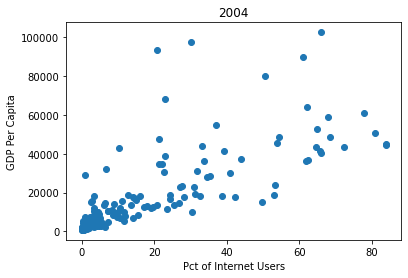

In [21]:
#a. 2004 Percent Using the Internet vs GDP Per Capita
#b. 2009 Percent Using the Internet vs GDP Per Capita
#c. 2014 Percent Using the Internet vs GDP Per Capita
plt.scatter(gdp_int2004['Internet_Users_Pct'], gdp_int2004['GDP_Per_Capita'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2004')

Text(0.5, 1.0, '2009')

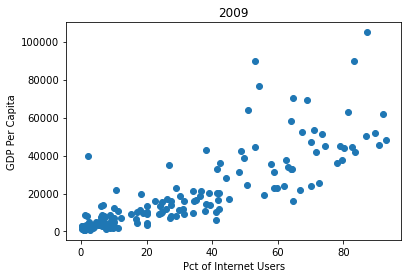

In [22]:
plt.scatter(gdp_int2009['Internet_Users_Pct'], gdp_int2009['GDP_Per_Capita'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2009')

Text(0.5, 1.0, '2014')

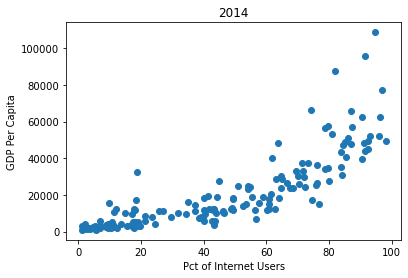

In [23]:
plt.scatter(gdp_int2014['Internet_Users_Pct'], gdp_int2014['GDP_Per_Capita'])
plt.ylabel('GDP Per Capita')
plt.xlabel('Pct of Internet Users')
plt.title('2014')

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <BarContainer object of 10 artists>)

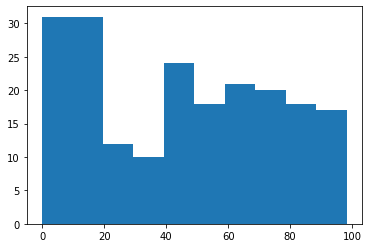

In [24]:
plt.hist(gdp_int2014['Internet_Users_Pct'])

(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

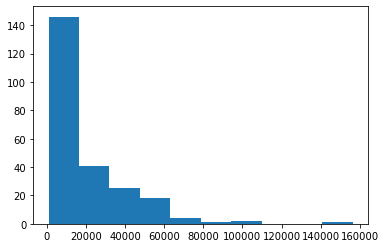

In [25]:
plt.hist(gdp_int2014['GDP_Per_Capita'])

Array of integers is unimodal, if:

-it is strictly increasing in the beginning;

-after that it is constant;

-after that it is strictly decreasing.

Ok yeah, all of these are looking pretty darn unimodal to me! Especially in 2009 & 2014, 2004 was pretty early on.


In [26]:
gpd_int2014topinternet = gdp_int2014.nlargest(n=5, columns=['Internet_Users_Pct'])
print(gpd_int2014topinternet)
top_5_internet = gdp_realyears[gdp_realyears['Country'].isin(gpd_int2014topinternet['Country'])]

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014    49652.149500               98.16
561   Bermuda  2014    77361.104881               96.80
4648   Norway  2014    62589.373548               96.30
1452  Denmark  2014    52214.537753               95.99
6872  Andorra  2014             NaN               95.90


Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

This top_5_internet works really well!!!

In [27]:
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
561   Bermuda  2014    77361.104881           96.800000
566   Bermuda  2009    89961.982744           83.250000
571   Bermuda  2004    90195.811033           60.990867
1452  Denmark  2014    52214.537753           95.990000
1457  Denmark  2009    50274.075696           86.840000
1462  Denmark  2004    50607.628971           80.930000
2625  Iceland  2014    49652.149500           98.160000
2630  Iceland  2009    48177.084123           93.000000
2635  Iceland  2004    45145.545658           83.880000
4648   Norway  2014    62589.373548           96.300000
4653   Norway  2009    61886.564498           92.080000
4658   Norway  2004    60893.410993           77.690000
6872  Andorra  2014             NaN           95.900000
6877  Andorra  2009             NaN           78.530000
6882  Andorra  2004             NaN           26.837954


Andorra really flew up the list in the 10 year span, gaining ~35% of the total population in internet users in the time frame

g = sns.FacetGrid(df, col = "Product", row = 'Day')

Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

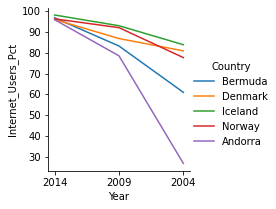

In [28]:
grid = sns.FacetGrid(top_5_internet, hue = "Country")
grid.map(sns.lineplot, 'Year', 'Internet_Users_Pct')
#grid.xticks('2004','2009','2014')
grid.add_legend()
#This works for now, but I want to move the year to a different order

Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [29]:
gpd_int2014bottominternet = gdp_int2014.nsmallest(n=5, columns=['Internet_Users_Pct'])
print(gpd_int2014bottominternet)
bottom_5_internet = gdp_realyears[gdp_realyears['Country'].isin(gpd_int2014bottominternet['Country'])]

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7080  Dem. People's Rep. of Korea  2014             NaN                0.00
7138                      Eritrea  2014             NaN                0.99
6219                  Timor-Leste  2014     3264.568070                1.14
827                       Burundi  2014      886.235777                1.38
7675                      Somalia  2014             NaN                1.63


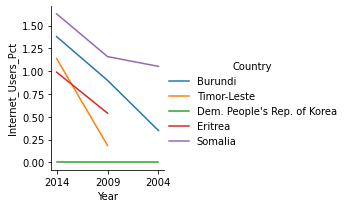

In [30]:
grid = sns.FacetGrid(bottom_5_internet, hue = "Country")
grid.map(sns.lineplot, 'Year', 'Internet_Users_Pct')
grid.add_legend()

Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80


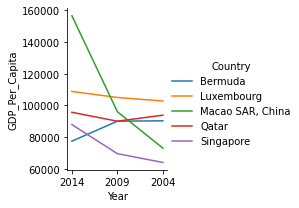

In [31]:
print(gdp_int2014.nlargest(n=5, columns=['GDP_Per_Capita']))
gdp_int2014topgdp = gdp_int2014.nlargest(n=5, columns=['GDP_Per_Capita'])
top_5_GDP = gdp_realyears[gdp_realyears['Country'].isin(gdp_int2014topgdp['Country'])]
grid = sns.FacetGrid(top_5_GDP, hue = "Country")
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
grid.add_legend()

Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95


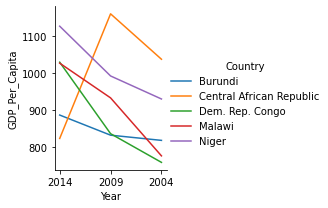

In [32]:
print(gdp_int2014.nsmallest(n=5, columns=['GDP_Per_Capita']))
gdp_int2014bottomgdp = gdp_int2014.nsmallest(n=5, columns=['GDP_Per_Capita'])
bottom_5_GDP = gdp_realyears[gdp_realyears['Country'].isin(gdp_int2014bottomgdp['Country'])]
grid = sns.FacetGrid(bottom_5_GDP, hue = "Country")
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')
grid.add_legend()

Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?